In [110]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sb 

In [143]:
data=pd.read_csv('F:\Dataset\winequality-red.csv')

# importing packages##### 

In [145]:
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier


In [147]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##### checking number of records imported

In [149]:
len(data)

1599

##### running decriptive stats across all variables

In [151]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


##### check if there is any null or missing values

In [153]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##### checking if na values 

In [155]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##### Unique values of "Quality" 

In [157]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

##### Look at quality ranges##### 

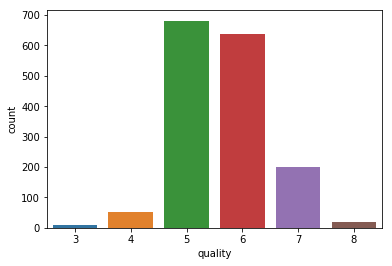

In [159]:
sb.countplot(x=data.quality,data=data)

##### generating chart that compares "quality" against all variables

C:\Users\Ankit Bhatia\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


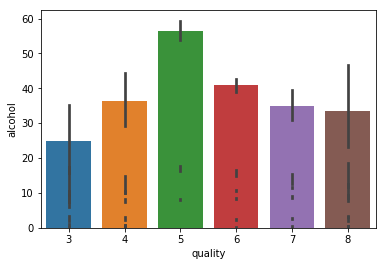

In [161]:
data1=data.select_dtypes([np.int, np.float])
for i, col in enumerate(data1.columns):
    sb.barplot(x=data.quality,y=col, data=data1)


##### Preprocessing data before modelling

###### split the quality of wine into good and bad & assign numeric variables 

In [165]:
binns=(2,6.5,8)
# group_names=["good", "bad"]
# data.quality=pd.cut(x=data.quality, bins= binns, labels= group_names)
#categorical values of variable wont be read , so encoding them
group_names = ['bad', 'good']
arr=np.array(data["quality"])
arr


array(['bad', 'bad', 'bad', ..., 'bad', 'bad', 'bad'], dtype=object)

In [166]:
data["quality"]=pd.cut(arr,bins=binns,right=True , labels=group_names)
data["quality"].head(4)

TypeError: '<' not supported between instances of 'float' and 'str'

In [167]:
label_quality=LabelEncoder()

In [168]:
data.quality=label_quality.fit_transform(data.quality)

In [169]:
data.quality.unique()

array([0, 1], dtype=int64)

#### splitting data into training and testing

In [171]:
all_inputs=data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
'pH', 'sulphates', 'alcohol']].values
all_inputs


array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [173]:
all_labels=data['quality'].values
all_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [175]:
all_inputs[:2]

array([[ 7.4   ,  0.7   ,  0.    ,  1.9   ,  0.076 , 11.    , 34.    ,
         0.9978,  3.51  ,  0.56  ,  9.4   ],
       [ 7.8   ,  0.88  ,  0.    ,  2.6   ,  0.098 , 25.    , 67.    ,
         0.9968,  3.2   ,  0.68  ,  9.8   ]])

###### Do standard scaling ; to compare data that corresponds to different units###### 

In [177]:
std_scale=StandardScaler()

In [179]:
all_inputs=std_scale.fit_transform(all_inputs)

In [181]:
(x_train, x_test, y_train, y_test)= train_test_split(all_inputs, all_labels, test_size=0.25, random_state=2)
x_test

array([[ 2.11448043, -0.76993107,  1.99765822, ..., -0.84951886,
        -0.16611498,  0.35389538],
       [ 1.48249695, -1.16098443,  1.27875175, ..., -0.20159105,
         0.66006809,  1.01096612],
       [-0.35600048,  0.23563472, -0.31311257, ..., -0.97910442,
        -0.69723268, -0.58477711],
       ...,
       [ 0.85051346, -0.8816606 ,  0.61119574, ..., -0.97910442,
        -0.40216729, -0.58477711],
       [ 1.59740303, -1.21684919,  1.12470036, ..., -1.23827555,
         2.13539502,  0.16616088],
       [ 3.43590046, -1.21684919,  2.40846192, ..., -2.92288785,
         0.77809425, -1.8989186 ]])

###### DECISION TREE - MODELLING#####

In [183]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import cohen_kappa_score

In [185]:
decisionTree=DecisionTreeClassifier()

In [187]:
decisionTree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [189]:
decisionTree.predict(x_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [191]:
decisionTree.score(x_test, y_test)

0.84

#### Trying  with different models#### 

In [192]:
Knn=KNeighborsClassifier()
Rf=RandomForestClassifier()
bagging=BaggingClassifier(base_estimator=decisionTree)
boosting=AdaBoostClassifier(base_estimator=decisionTree)

In [193]:
models=[Knn, decisionTree, Rf, bagging, boosting]
name=['Knn', 'decisionTree', 'Rf', 'bagging', 'boosting']
acc=[]
for m in range(len(models)):
    clf=models[m]
    clf.fit(x_train, y_train)
    pred=clf.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
m={"modelName": name, "Accuracy":acc}
table=pd.DataFrame(m)
print(table)

      modelName  Accuracy
0           Knn    0.8675
1  decisionTree    0.8425
2            Rf    0.8900
3       bagging    0.9025
4      boosting    0.8350


#### Optimizig Decision Tree#### 

###### grid search CV allows you to find a set of parameters that you want to try with a given model and will automatically run CV using each of those parameters keeping the track of resulting scores.Basically, it replaces the for loop used in CV and add on some extra functionality###### 

In [195]:
scoresDT=cross_val_score(decisionTree,all_inputs,all_labels, scoring="accuracy", cv=10).mean()
scoresknn=cross_val_score(Knn,all_inputs,all_labels, scoring="accuracy", cv=10).mean()
scoresRF=cross_val_score(Rf,all_inputs,all_labels, scoring="accuracy", cv=10).mean()
scoresBagg=cross_val_score(bagging,all_inputs,all_labels, scoring="accuracy", cv=10).mean()
scoresBoost=cross_val_score(boosting,all_inputs,all_labels, scoring="accuracy", cv=10).mean()
crossvalscore=[scoresknn, scoresDT,scoresRF,scoresBagg,scoresBoost]
name=['Knn', 'decisionTree', 'Rf', 'bagging', 'boosting']
s={"modelName":name,"CrossValScore":crossvalscore}
table=pd.DataFrame(s)
print(table)

      modelName  CrossValScore
0           Knn       0.852985
1  decisionTree       0.826669
2            Rf       0.869283
3       bagging       0.869916
4      boosting       0.839200


#### from above scores Random Forest performs best. So, applying Grid Search 

In [198]:
param={'criterion':['gini', 'entropy'], 'max_depth':[1,2]}
gridSearch=GridSearchCV(estimator=Rf, param_grid=param, scoring="accuracy", refit=False)
gridSearch


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [1, 2]},
       pre_dispatch='2*n_jobs', refit=False, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [206]:
best=gridSearch.fit(all_inputs,all_labels)
# DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
#             max_features=None, max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=1, min_samples_split=2,
#             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
#             splitter='best')
best

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [1, 2]},
       pre_dispatch='2*n_jobs', refit=False, return_train_score='warn',
       scoring='accuracy', verbose=0)

###### https://www.interviewqs.com/blog/intro_to_scikit_learn

In [208]:
gridSearch.grid_scores_

C:\Users\Ankit Bhatia\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.86429, std: 0.00071, params: {'criterion': 'gini', 'max_depth': 1},
 mean: 0.87117, std: 0.00741, params: {'criterion': 'gini', 'max_depth': 2},
 mean: 0.86429, std: 0.00071, params: {'criterion': 'entropy', 'max_depth': 1},
 mean: 0.86929, std: 0.00738, params: {'criterion': 'entropy', 'max_depth': 2}]

In [212]:
gridSearch.grid_scores_[1].cv_validation_scores

C:\Users\Ankit Bhatia\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


array([0.8670412 , 0.86491557, 0.88157895])

In [213]:
gridSearch.grid_scores_[1]


C:\Users\Ankit Bhatia\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


mean: 0.87117, std: 0.00741, params: {'criterion': 'gini', 'max_depth': 2}

In [214]:
gridSearch.best_score_

0.8711694809255784

In [215]:
gridSearch.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [216]:
gridSearch.best_index_

1

#### Using best parameters to make predictions

In [223]:
NewRf=RandomForestClassifier(max_depth=2)

In [225]:
NewRf.fit(all_inputs,all_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [226]:
pred=NewRf.predict(x_test)
accuracy_score(pred,y_test)

0.8675